## ================================================================
# Purpose:      Python script for Data Exploration
# Author:       BC2407-S02 Team 8
# Updated:      03/04/2021
# Topics:       Data cleaning and visualisation
# Data Source:  Kaggle E-commerce Data
# Packages:     pandas, numpy, matplotlib, seaborn
## ================================================================


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [24]:
df = pd.read_csv('data.csv', encoding= "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


After importing the dataset, we can see that the dataset has many useful information that will be utilised greatly in our models. 

InvoiceNo and InvoiceDate will play a great part in our Time-Series Forecasting model.

StockCode, Description, CustomerID and Country will play a great part in our Association Rules model.

As for Quantity and UnitPrice, while they are great indicators, it may not give straightforward information at a glance. Hence, we have chose to introduce a new column 'Revenue' = 'UnitPrice' * 'Quantity', so that we are able to see how much revenue each transaction generates.

In [4]:
df.loc[:,'Revenue'] = df['UnitPrice'] * df['Quantity']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


# Data Cleaning

Now, we will begin taking steps to clean the data.

The first step lies in changing the InvoiceDate from an object type to a datetime type.

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#df = df.set_index('InvoiceDate')

Next, we will look at the number of null values in each column.
From the cell below, it is observed that only 'Description' and 'CustomerID' have null values. 

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Revenue             0
dtype: int64

Next, we will observe the rows that have null values for the 'Description' column. As seen in the cell below, for these empty description items, there does not seem to be a unitprice for them. In other words, there is no revenue generated from this items. Furthermore, the CustomerID for these transactions are also empty. 

The initial thoughts could be that these items are gifts that come together with a purchase. However, in those situations, it would be reasonable to set a CustomerID to these rows in order to trace back which customers received a gift in their purchase. Hence, the conclusion made here will be that these rows shall not be used and are to be dropped. Before doing so, we will confirm the suspicion that all 'CustomerID' are empty.

In [7]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,-0.0
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,0.0
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,0.0
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0


In [8]:
df[df['Description'].isnull()]['CustomerID'].sum()

0.0

It is concluded that all these rows with null 'Descriptions' have null 'CustomerID' as well. Thus, we will be dropping all these rows.

In [9]:
df = df.dropna(subset = ['Description'])



df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
Revenue             0
dtype: int64

Now, we will move onto the null values for 'CustomerID'

As seen in the cell below, there does not seem to be any particular reasons why these CustomerID are empty. 

With the data available, it is impossible to impute values for the user and thus, these entries are useless for us. Hence, we will drop these rows.

In [10]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,14.94
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79


In [11]:
df.dropna(subset = ['CustomerID'], inplace = True)

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Revenue        0
dtype: int64

After removing the null values for 'CustomerID', we have achieved a dataframe filled at 100% for all variables. Now, we will check for duplicate entries.

From the cell below, there do exists duplicated rows. We will hence drop these duplicate rows.

In [12]:
df.duplicated().sum()

5225

In [13]:
df.drop_duplicates(inplace= True)

df.duplicated().sum()

0

# Data Exploration and Visualisation

The dataframe consists of 8 (original) variables. In particular,

### InvoiceNo: Invoice Number of the transaction. A 6-digit number uniquely assigned to each transaction. If it starts with 'C', it indicates a cancellation/refund.

### StockCode: Product code. A 5-digit number uniquely assigned to each distinct product.

### Description: Product name.

### Quantity: The quantity of the product in the transaction.

### InvoiceDate: Invoice Date and Time.

### Unit Price: The unit price of the product.

### CustomerID: The unique identifier number of each customer.

### Country: Name of the country that the purchase is shipped to / made from.

We will explore the more useful variables, beginning with countries.

# Countries

We will take a look at hte countries from which the orders are made from.

In [14]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Number of unique countries: {}'.format(len(countries)))

Number of unique countries: 37


In [15]:
print(countries.head(), '\n')

uk_count = df[df['Country'] == 'United Kingdom']['Country'].count()
all_count = df['Country'].count()
uk_perc = uk_count/all_count
print(str('{0:.2f}%').format(uk_perc*100))

United Kingdom    19857
Germany             603
France              458
EIRE                319
Belgium             119
Name: Country, dtype: int64 

88.83%


We can see here the countries that have the greatest number of unique transactions occurred. 

United Kingdom in particular, has 88.83% of transactions in the entire dataset. This is abnormally large and it will be difficult to show the results on a graph. Hence, we will remove UK from the graphs to be shown next.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text major ticklabel objects>)

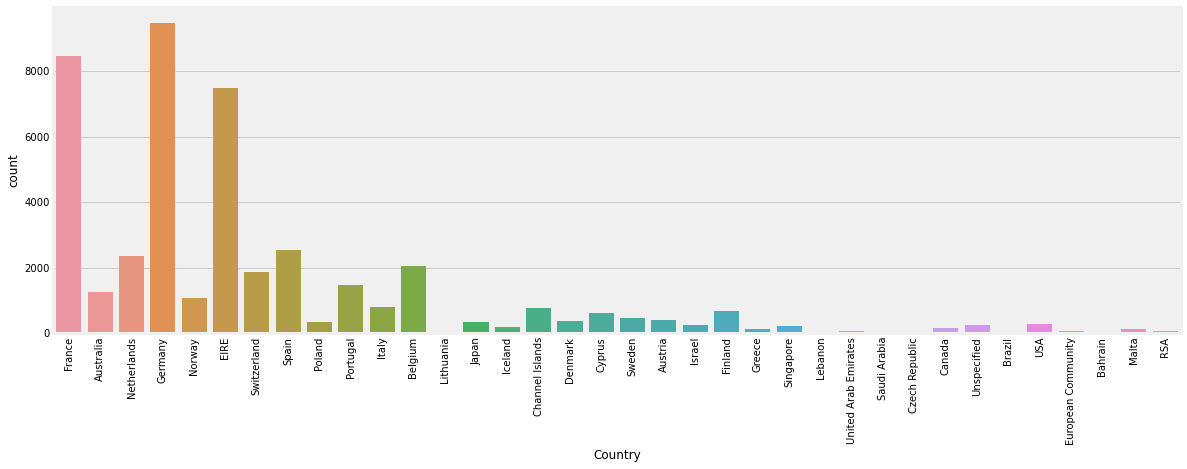

In [16]:
plt.figure(figsize=(18,6))
sns.countplot(df[df['Country'] != 'United Kingdom']['Country'])
plt.xticks(rotation=90)

After displaying the box plot for all countries except United Kingdom, we can see that France, Germany and EIRE (aka Ireland) have the next highest number of transactions occurring.

For the sake of displaying UK in the graph as well, we will perform a logarithmic transformation below.

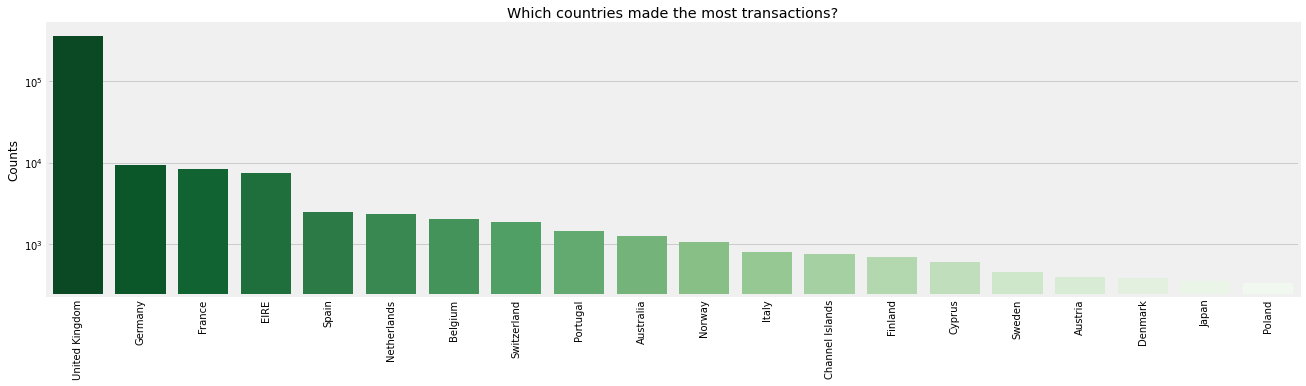

In [17]:
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

# Customer Purchases

Initially, we wanted to look at the highest occurring counts of 'CustomerID'. However, upon re-evaluation, that might not be the most impactful indicator. Reason being, even though the Customer may make the most transactions, they may not generate the most Revenue. In other words, the purchases they make are frequent, but of little value/price. Hence, what we will do is look at the Revenues generated by each customer.

In [18]:
customer_revenue = df.groupby('CustomerID').agg({'Revenue':'sum'})

customer_revenue.sort_values(ascending=False, by = 'Revenue')

,Revenue
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187322.17
14911.0,132458.73
12415.0,123725.45
...,...
12503.0,-1126.00
17603.0,-1165.30
14213.0,-1192.20


Here we can see that CustomerID 14646.0 has the highest revenue of 279 thousand dollars. On the other hand, at the bottom rows we observe that there are multiple CustomerID with negative revenue. The conclusion that we have came up is that instead of Customers, these may be the Suppliers/Sellers. In other words, these are the ones who are providing the e-commerce shop with the items to be sold on the site.

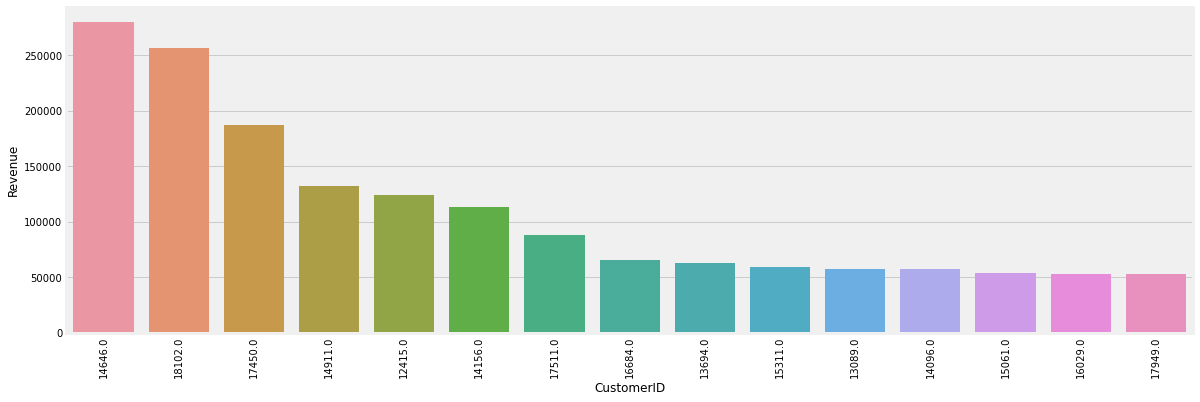

In [19]:
item_counts = customer_revenue.sort_values(by = 'Revenue', ascending = False).iloc[0:15]
plt.figure(figsize = (18,6))
sns.barplot(item_counts.index, item_counts['Revenue'], order = item_counts.index)
plt.xticks(rotation=90);

# Products Sold

Here we will explore the products that are sold the most. 

This information can be useful to the e-commerce,in particular they could look at the most sold items and decide whether or not a raise in price could be done. If an increase is price is made without a large drop in quantity sold, then it will generate a larger profit margin for the shop.

On the other hand, they could also look at the items which are sold the least, and look to either remove these items from their shop, or look for ways to advertise for the sale of these products or run promotions and offers on these products.


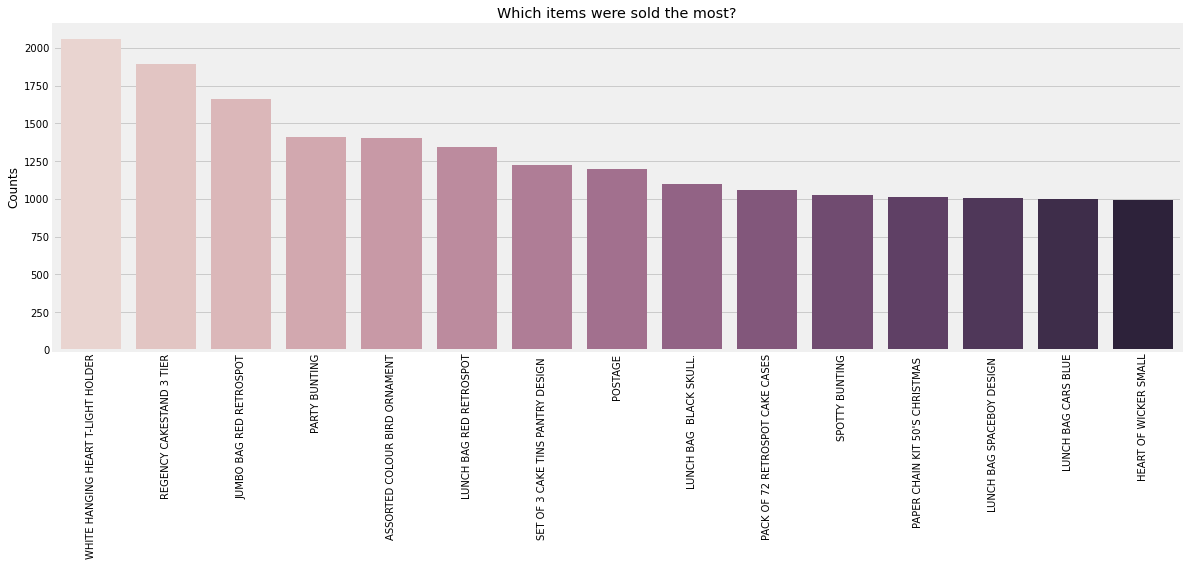

In [20]:
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were sold the most?");
plt.xticks(rotation=90);

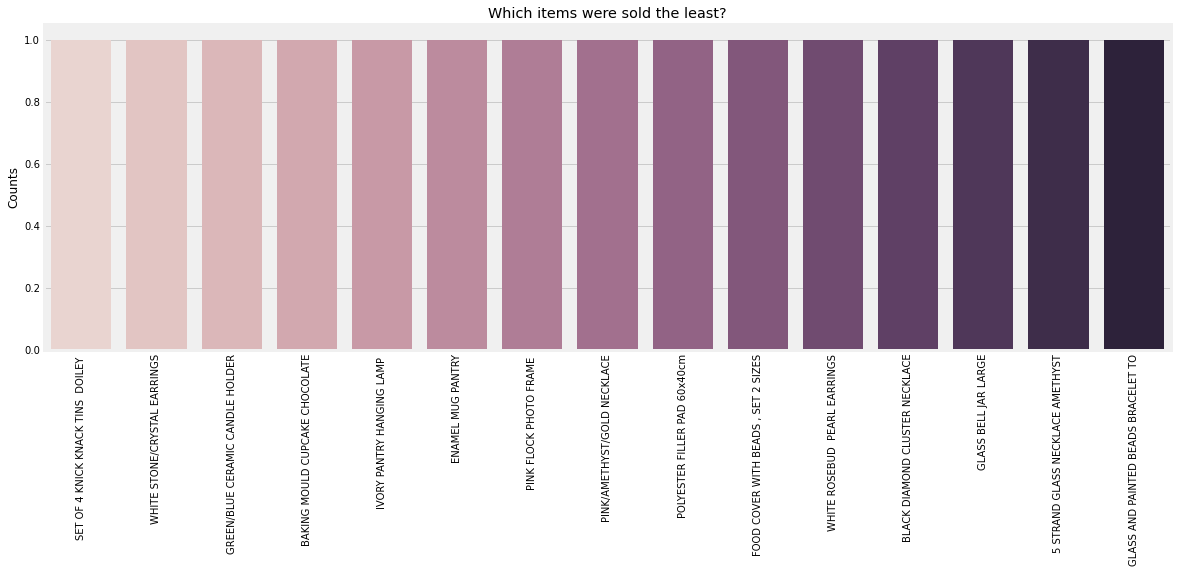

In [21]:
item_counts = df['Description'].value_counts().sort_values(ascending=True).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were sold the least?");
plt.xticks(rotation=90);

# Conclusion

Now that the cleaning, exploration and visualisation of the data is finished, the next step will be to look into using this dataset for our models.

Refer to 'Association Rules.ipynb' and 'Time Series.ipynb'.

In [22]:
df.to_csv('data_final.csv')